In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as scisig
import scipy.optimize as opt

In [2]:
charge = 2 * 1.6e-19  # Coulombs
efield = 250          # V/m when 1 V is applied

# Calibration factor converting <V^2> to <z^2>
# <z^2> = <V^2> / c_cal_square
c_cal_square = 80179930463.28465

In [4]:
data_file = rf"D:\Experiment\Calibration\20230910\39khz_0_1vp2p.csv"
data = np.genfromtxt(data_file, delimiter=',', skip_header=3).T

In [10]:
Tinterval = data[0][1]

In [12]:
PSD = scisig.welch(data[1], fs = int(1/Tinterval), nperseg = int(1/Tinterval))

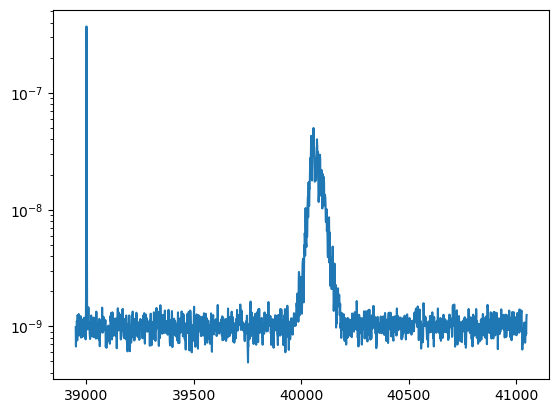

In [24]:
lb = 38950
ub = 41050
plt.plot(PSD[0][lb:ub], PSD[1][lb:ub])
plt.yscale('log')

In [17]:
area = np.trapz(PSD[1][lb:ub], PSD[0][lb:ub]) - 10**(-9)*100

In [21]:
q2 = area/c_cal_square

In [20]:
force = charge*efield*0.05

In [22]:
mass = 2200*4/3*np.pi*(83*10**(-9))**3

In [48]:
w0 = 40050*2*np.pi
y = 2*np.pi*100
wd = 39000*2*np.pi

In [49]:
q2_exp = force**2/2/mass**2/((w0**2-wd**2)**2+(wd*y)**2)

In [50]:
q2

8.149123647552418e-18

In [51]:
q2/q2_exp

304.3488220462005

In [54]:
np.sqrt(c_cal_square)*1000/10**9

0.2831606089541493